In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
diamonds = pd.read_csv('./kickoff/diamonds.csv').reset_index(drop=True)

In [3]:
ricks_diamonds = pd.read_csv('./kickoff/rick_diamonds.csv').reset_index(drop=True)

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Mean

## Without outliers

> 17285.046788990825

## With outliers

> 3934.409644462607

# Correlation

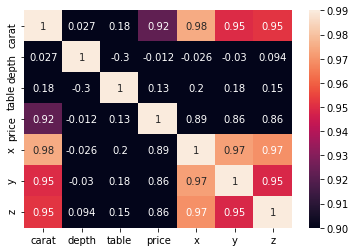

In [211]:
corr = diamonds.corr()
sns.heatmap(corr, vmin=0.9, vmax=0.99, annot=True)

# The 4 C's

In [241]:
diamonds['clarity'].value_counts()

SI1     11832
VS2     11125
SI2      8307
VS1      7449
VVS2     4635
VVS1     3321
IF       1613
I1        658
Name: clarity, dtype: int64

In [172]:
diamonds.color.unique() # J, I, H, G, F, E, D

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

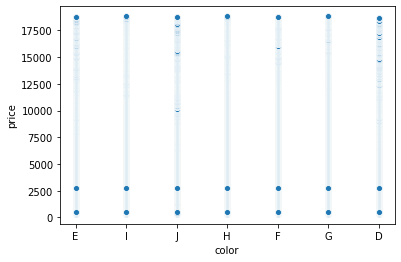

In [223]:
sns.scatterplot(diamonds['color'], y)

In [163]:
diamonds.cut.unique() # Fair, Good, Very Good, Premium, Ideal

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [164]:
diamonds.clarity.unique() # I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

array(['SI1', 'VS1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

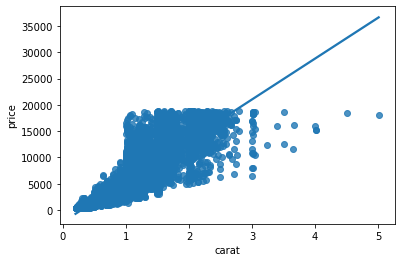

In [160]:
sns.regplot('carat', 'price',data=diamonds)

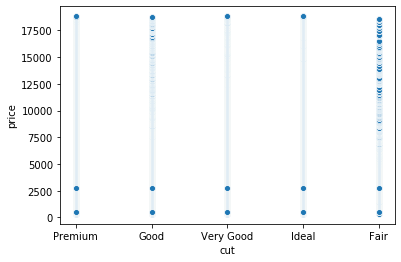

In [227]:
sns.scatterplot(diamonds['cut'], y)

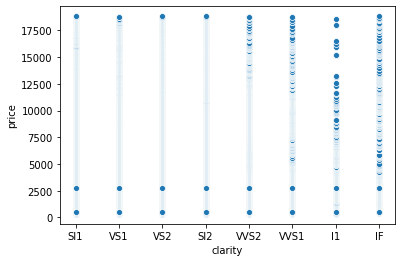

In [224]:
sns.scatterplot(diamonds['clarity'], y)

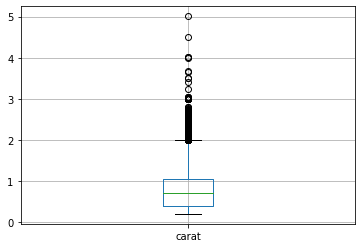

In [242]:
diamonds.boxplot(column='carat')

# Linear regression

In [237]:
ricks_diamonds_dummified = pd.get_dummies(ricks_diamonds)
dummies = pd.get_dummies(diamonds)

model = LinearRegression()
X = dummies[['carat', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
y = dummies['price']
model.fit(X,y)

data_to_predict = ricks_diamonds_dummified[['carat', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
price_predicted = model.predict(data_to_predict)

y_pred = pd.Series(model.predict(X))
y_obs = dummies['price']

rmse = np.sqrt(mean_squared_error(y_obs, y_pred).astype(int))
score = model.score(X, y)

print(f'RMSE: {rmse}\nSCORE: {score}')


RMSE: 1152.7753467176508
SCORE: 0.9164978293433101


In [ ]:
ricks_diamonds_dummified = pd.get_dummies(ricks_diamonds)
dummies = pd.get_dummies(diamonds)

model = LinearRegression()
X = dummies[['carat', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
y = dummies['price']
model.fit(X,y)

data_to_predict = ricks_diamonds_dummified[['carat', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
price_predicted = model.predict(data_to_predict)

y_pred = pd.Series(model.predict(X))
y_obs = dummies['price']

rmse = np.sqrt(mean_squared_error(y_obs, y_pred).astype(int))
score = model.score(X, y)

print(f'RMSE: {rmse}\nSCORE: {score}')

# Adding column

In [229]:
ricks_diamonds['price_predicted'] = price_predicted.astype(int)

In [193]:
ricks_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3224
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,524
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1476
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,7480
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,16172
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,-1292
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,2824
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,5728
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,1132


# Exporting .csv

In [194]:
ricks_diamonds.to_csv('./ricks_diamonds.csv')

# EDA

In [5]:
mean = diamonds.price.mean()
standard_deviation = diamonds.price.std()
price = diamonds.price
carat = diamonds.carat

In [9]:
mean_carat = diamonds.carat.mean()
carat_std = diamonds.carat.std()

In [11]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [12]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
carat      48940 non-null float64
cut        48940 non-null object
color      48940 non-null object
clarity    48940 non-null object
depth      48940 non-null float64
table      48940 non-null float64
price      48940 non-null int64
x          48940 non-null float64
y          48940 non-null float64
z          48940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


## Median

In [13]:
diamonds.price.median()

2401.0

In [14]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
sns.distplot(diamonds['price'])

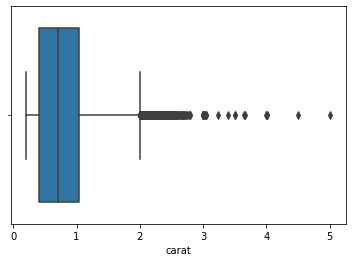

In [24]:
sns.boxplot(diamonds.carat)

# Filtering outliers by weight

In [177]:
upper_cutoff = mean_carat + (3 * carat_std)
lower_cutoff = mean_carat - (3 * carat_std)
outside = (carat >= upper_cutoff ) | (carat <= lower_cutoff)
inside = (carat < upper_cutoff ) & (carat > lower_cutoff)

outliers = pd.DataFrame(diamonds[outside]).reset_index()
inside = pd.DataFrame(diamonds[inside]).reset_index()